# Analyzing hashtag co-occurrence network

We can select a hashtag or set of hashtags of an interest to study online conversations. 

Tools like Indiana University's Observatory of Social Media [OSoMe](http://osome.iuni.iu.edu/tools/)
has tools for tracking, visualizing and analyzing online conversations.

One can also collect datasets directly from Twitter's Search API and Stream API. However, these API endpoints have
limitations in terms of number of days one can search back in time or requirement for collecting streaming data
online.

OSoMe tools gives a glimpse of historical data. Once we identify promising time intervals, set of keywords etc. 
We can consider data collection from historical Twitter archives one might have or using Twitter's Search API.

We first used the __Trends__ tool to display volume of activity to identify timeframe of an interest.

Later, we use the __Networks__ tool to visualize either hashtag co-occurrence or retweet-mention network.

Users can export small dataset of network from this tool. You can find the dataset, I collected in `data/osome_demo_htag.json` file.

In [1]:
# Import some of the relevant Python packages here.
%matplotlib inline 
%load_ext autoreload
%autoreload 2
import json

import matplotlib
from matplotlib import pyplot as plt

import pandas as pd
import networkx as nx
print('NetworkX version: ', nx.__version__)

NetworkX version:  2.4


In [2]:
# Read Json file exported from OSoMe

htagData = json.load(open('../data/osome_demo_htag.json', 'r'))

print(len(htagData), 'data points in the file')
print('Example data point:\n', htagData[0])

12140 data points in the file
Example data point:
 {'source': '#reyhanlı', 'target': '#altın', 'tweet_id': '1259793462880321537', 'type': 'cooccur', 'weight': '1'}


In [3]:
# Let's build a hashtag co-occurence network

htagNet = nx.Graph() # Co-occurence networks are undirected, so we can select nx.Graph instead of nx.DiGraph
htagNet.name = 'Hashtag co-occurrence network'

for rec in htagData:
    htagNet.add_edge(rec['source'], rec['target'], weight=float(rec['weight']))

print(nx.info(htagNet)) # Print some basic statistics of the network

Name: Hashtag co-occurrence network
Type: Graph
Number of nodes: 449
Number of edges: 9521
Average degree:  42.4098


#millihesaplaryanyana 428
#millihesaplarburada 382
#millihesaplartakipte 276
#millibirlikhareketi 254
#millihesaplarburda 244
#milliyetcihesaplaryanyana 213
#ramazan 176
#milliteknolojihamlesi 172
#millihesaplartakiplesiyor 164
#survivor2020 147


Text(0, 0.5, 'Histogram')

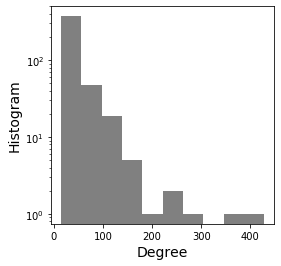

In [4]:
degreeSeq = dict(nx.degree(htagNet))

# Let's look at the top 10 nodes with highest degree
for n in sorted(degreeSeq, key=degreeSeq.get, reverse=True)[:10]:
    print(n, degreeSeq[n])

fig = plt.figure(figsize=(4,4))
plt.hist(degreeSeq.values(), color='0.5')
plt.yscale('log')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Histogram', fontsize=14)


## Exporting and visualizing the network

At this stage we can export and visualize the network using your favorite tools. 

There are plenty of options; [Gephi](https://gephi.org/) and [Cytoscape](https://cytoscape.org/) are some of the popular tools.

In [13]:
# Export to a file
# Gephi has different export functions "write_*". 
# I selected Gexf format to read this network and it's metadata with Gephi.
nx.write_gexf(htagNet, '../data/osome_demo_htag.gexf')

## Select relevant hashtags for larger data collection

We can consider different [network centrality measures](https://en.wikipedia.org/wiki/Centrality). 

NetworkX implements most of the centrality measures listed in its [documentation](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).

In [14]:
nProperties = {n:{'degree_N':v } for n,v in htagNet.degree()}

print('Computing degree_centrality')
for n,c in nx.degree_centrality(htagNet).items():
    nProperties[n]['degree_C'] = c

print('Computing closeness_centrality')
for n,c in nx.closeness_centrality(htagNet).items():
    nProperties[n]['closeness_C'] = c
    
print('Computing betweenness_centrality')
for n,c in nx.betweenness_centrality(htagNet).items():
    nProperties[n]['betweenness_C'] = c
        
print('Computing pagerank')
for n,c in nx.pagerank(htagNet).items():
    nProperties[n]['pagerank_N'] = c
    
print('Computing clustering')
for n,c in nx.clustering(htagNet).items():
    nProperties[n]['clustering_N'] = c
    
print('Computing node_clique_number')
for n,c in nx.node_clique_number(htagNet).items():
    nProperties[n]['clique_N'] = c
    
print('Computing core_number')
for n,c in nx.core_number(htagNet).items():
    nProperties[n]['core_N'] = c

print('Computing onion_layers')
for n,c in nx.onion_layers(htagNet).items():
    nProperties[n]['onion_N'] = c
    

Computing degree_centrality
Computing closeness_centrality
Computing betweenness_centrality
Computing pagerank
Computing clustering
Computing node_clique_number
Computing core_number
Computing onion_layers


In [35]:
# Convert into dataframe
nPropDf = pd.DataFrame.from_dict(nProperties, orient='index')
nPropDf = nPropDf.sort_values(by='closeness_C', ascending=False)
nPropDf.head(25)

,degree_N,degree_C,closeness_C,betweenness_C,pagerank_N,clustering_N,clique_N,core_N,onion_N
#millihesaplaryanyana,428,0.955357,0.957265,0.270459,0.020445,0.095395,27,27,57
#millihesaplarburada,382,0.852679,0.871595,0.157603,0.017969,0.106100,24,27,57
#millihesaplartakipte,276,0.616071,0.722581,0.046616,0.012718,0.146561,24,27,57
#millibirlikhareketi,254,0.566964,0.697819,0.042820,0.011737,0.154119,24,27,57
#millihesaplarburda,244,0.544643,0.687117,0.032099,0.011220,0.164069,19,27,57
#milliyetcihesaplaryanyana,213,0.475446,0.655930,0.022223,0.009810,0.184782,22,27,57
#ramazan,176,0.392857,0.622222,0.022178,0.008238,0.191883,26,27,56
#milliteknolojihamlesi,172,0.383929,0.618785,0.012919,0.007888,0.215898,19,27,57
#millihesaplartakiplesiyor,164,0.366071,0.612022,0.011403,0.007525,0.221832,19,27,57
#survivor2020,147,0.328125,0.598131,0.014501,0.006911,0.221415,26,27,55


In [36]:
# We should also consider hashtag hijacking. 
# In this case people look for popular hashtags to inject their content to benefit from it's popularity.
# One signatures of this behavior is the tweets with lots of hashtags. This lead high clique number.
# It's also important for the social bot detection case, 
# because hashtag hijacking may lead to over estimation of bot participation 
# if we assume bots drive hijacked content

# Hijacked content can be seen for nodes with top 50 highest clique number.
# Approximately top 25 is about pornography and the following 25 is about religion

nPropDf.sort_values(by='clique_N', ascending=False).head(5)

,degree_N,degree_C,closeness_C,betweenness_C,pagerank_N,clustering_N,clique_N,core_N,onion_N
#millihesaplaryanyana,428,0.955357,0.957265,0.270459,0.020445,0.095395,27,27,57
#lgbt,26,0.058036,0.503371,0.000000,0.001957,1.000000,27,26,37
#liseli,34,0.075893,0.519722,0.000807,0.002310,0.655971,27,26,38
#lez,34,0.075893,0.519722,0.000807,0.002310,0.655971,27,26,38
#lezbiyen,34,0.075893,0.519722,0.000807,0.002310,0.655971,27,26,38


## Selecting relevant hashtags from top list

In this stage, we can educate ourselves on relevant content and the noisy hashtags
on the birdseye view content map.

We can pick hashtags that are frequent and ranked more central in the convesation. 
This broader hashtag list can be used to gather more comprehensive dataset.


In [40]:
# Most hashtags follow pattern "millihesaplar*", so let's look at the most frequent ones

nPropDf['inPattern'] = nPropDf.apply(lambda x: x.name.startswith('#millihesaplar'), axis=1)
nPropDf['hasKeywords'] = nPropDf.apply(lambda x: 'milli' in x.name and 'hesap' in x.name, axis=1)

nPropDf[nPropDf['hasKeywords'] == 1]

,degree_N,degree_C,closeness_C,betweenness_C,pagerank_N,clustering_N,clique_N,core_N,onion_N,inPattern,hasKeywords
#millihesaplaryanyana,428,0.955357,0.957265,0.270459,0.020445,0.095395,27,27,57,True,True
#millihesaplarburada,382,0.852679,0.871595,0.157603,0.017969,0.106100,24,27,57,True,True
#millihesaplartakipte,276,0.616071,0.722581,0.046616,0.012718,0.146561,24,27,57,True,True
#millihesaplarburda,244,0.544643,0.687117,0.032099,0.011220,0.164069,19,27,57,True,True
#milliyetcihesaplaryanyana,213,0.475446,0.655930,0.022223,0.009810,0.184782,22,27,57,False,True
#millihesaplartakiplesiyor,164,0.366071,0.612022,0.011403,0.007525,0.221832,19,27,57,True,True
#milliveyerlihesaplartakiplesiyor,106,0.236607,0.567089,0.004340,0.004931,0.288230,19,27,56,False,True
#millihesaplaryanana,103,0.229911,0.564943,0.003467,0.004791,0.302494,19,27,56,True,True
#milliyetçihesaplaryanyana,103,0.229911,0.564943,0.003758,0.004846,0.309918,19,27,56,False,True
#millihesaplarbayramlasıyor,101,0.225446,0.563522,0.002991,0.004703,0.327327,19,27,56,True,True


In [47]:
# We can consider the list of hashtags that has the keywords: 'milli' and 'hesap' in it.

selectedHashtags = list(nPropDf[nPropDf['hasKeywords'] == 1].index)
print('\n'.join(selectedHashtags))

with open('../data/selected_htags.txt', 'w') as fl:
    fl.write('\n'.join(selectedHashtags))

#millihesaplaryanyana
#millihesaplarburada
#millihesaplartakipte
#millihesaplarburda
#milliyetcihesaplaryanyana
#millihesaplartakiplesiyor
#milliveyerlihesaplartakiplesiyor
#millihesaplaryanana
#milliyetçihesaplaryanyana
#millihesaplarbayramlasıyor
#millihesaplaryanyan
#millihesaplartakipleşiyor
#millihesaplar
#millihesaplarbüyüyor
#millihesaplarbirarada
#millihesaplarbayramlaşıyor
#millihesaplarbayramdatakiplesiyor
#millihesaplaryanya
#millihesaplarbueyueyor
#yerlimillihesaplaryanyana
#millihesaplaryanyanabiz
